In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer

## Read Data From File

In [2]:
# https://www.youtube.com/watch?v=iNlZ3IU5Ffw
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

col = ["Id", "Contributions", "JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
tcols = [x + '-T' for x in col]

In [3]:
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,1971706,0,0,0,0,2566242,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,4609687,0,0,0,0,0,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,3378185,0,0,0,0,2687760,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,11661,0,0,0,0,0,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8688


In [4]:
data.describe()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,1624.000000,1624.000000,1.624000e+03,1.624000e+03,1.624000e+03,1.624000e+03,1.624000e+03,1.624000e+03,1.624000e+03,1.624000e+03,...,1.624000e+03,1.624000e+03,1.624000e+03,1624.000000,1.624000e+03,1.624000e+03,1624.000000,1.624000e+03,1.624000e+03,1.624000e+03
mean,1.495690,529.600985,5.315356e+05,5.184027e+05,7.831550e+05,2.414227e+05,3.381915e+05,2.161867e+05,2.740556e+05,1.289529e+06,...,3.848453e+04,1.278387e+04,6.725526e+04,317.633005,3.861295e+04,2.976735e+05,68.605296,1.753575e+04,8.067859e+03,1.735911e+06
std,0.500135,2636.448822,3.882258e+06,3.713479e+06,1.094195e+07,3.023819e+06,3.386483e+06,1.906782e+06,3.176152e+06,1.111300e+07,...,1.451918e+06,2.413991e+05,7.247063e+05,7134.086830,2.052220e+05,2.833637e+06,1545.414738,7.025110e+05,3.251257e+05,1.705675e+07
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,6.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,87.000000,4.705500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.388000e+03,0.000000,0.000000e+00,0.000000e+00,9.300000e+03
75%,2.000000,534.750000,7.019675e+04,2.747225e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.871750e+03,1.945700e+04,0.000000,0.000000e+00,0.000000e+00,1.139852e+05
max,2.000000,97545.000000,1.305139e+08,6.525465e+07,3.674154e+08,8.483137e+07,6.963357e+07,4.261184e+07,6.911797e+07,2.595421e+08,...,5.842249e+07,6.640060e+06,1.027235e+07,207311.000000,4.929625e+06,8.072289e+07,48532.000000,2.831007e+07,1.310220e+07,4.112060e+08


In [5]:
data[col].mean()

Id               1.495690e+00
Contributions    5.296010e+02
JavaScript       5.315356e+05
Python           5.184027e+05
Java             7.831550e+05
C#               2.414227e+05
PHP              3.381915e+05
TypeScript       2.161867e+05
Ruby             2.740556e+05
C++              1.289529e+06
C                5.110464e+06
Swift            5.138497e+04
Go               5.546281e+05
Shell            1.005583e+05
Kotlin           1.297507e+04
Rust             3.836019e+04
PowerShell       1.802970e+03
Objective-C      4.741740e+04
R                5.122957e+03
MATLAB           4.018628e+04
Dart             3.848453e+04
Vue              1.278387e+04
Assembly         6.725526e+04
Sass             3.176330e+02
CSS              3.861295e+04
HTML             2.976735e+05
Pascal           6.860530e+01
Racket           1.753575e+04
Zig              8.067859e+03
Other            1.735911e+06
dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, mojombo to stdevteam
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CreatedAt      1624 non-null   object
 1   AvatarUrl      1624 non-null   object
 2   Id             1624 non-null   int64 
 3   Contributions  1624 non-null   int64 
 4   JavaScript     1624 non-null   int64 
 5   Python         1624 non-null   int64 
 6   Java           1624 non-null   int64 
 7   C#             1624 non-null   int64 
 8   PHP            1624 non-null   int64 
 9   TypeScript     1624 non-null   int64 
 10  Ruby           1624 non-null   int64 
 11  C++            1624 non-null   int64 
 12  C              1624 non-null   int64 
 13  Swift          1624 non-null   int64 
 14  Go             1624 non-null   int64 
 15  Shell          1624 non-null   int64 
 16  Kotlin         1624 non-null   int64 
 17  Rust           1624 non-null   int64 
 18  PowerShell     1624 no

## Transform Data

#### 1. Make the bytes into percentages

In [7]:
def turn_to_percent(X, columns):
    X[columns] = X[columns].div(X[columns].sum(axis=1), axis=0)
    return X

# Create a FunctionTransformer using the defined function and pass the subset_columns argument
transformer = FunctionTransformer(turn_to_percent, validate=False, kw_args={'columns': col[2:]})

# Apply the transformation to your dataset
data = transformer.transform(data)
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,0.0,0.0,0.0,0.0,0.001352,0.003039,0.0,0.0,0.0,0.041842
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000998,0.003733,0.0,0.0,0.0,0.139780
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,0.0,0.0,0.0,0.0,0.003311,0.067557,0.0,0.0,0.0,0.000468
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.018068,0.0,0.0,0.0,0.003162
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045699


#### 2. Standardize the data using a StandardScaler

In [8]:
scaler = StandardScaler()

data[tcols] = scaler.fit_transform(data[col])
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,-0.061918,-0.127003,-0.075001,-0.051644,-0.291466,-0.367562,-0.0387,-0.027586,-0.024822,-0.383910
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,-0.061918,-0.127003,-0.075001,-0.051644,-0.295372,-0.362811,-0.0387,-0.027586,-0.024822,-0.018586
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,-0.061918,-0.127003,-0.075001,-0.051644,-0.269832,0.074161,-0.0387,-0.027586,-0.024822,-0.538243
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,-0.061918,-0.127003,-0.075001,-0.051644,-0.306387,-0.264664,-0.0387,-0.027586,-0.024822,-0.528194
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,-0.061918,-0.127003,-0.075001,-0.051644,-0.306387,-0.388367,-0.0387,-0.027586,-0.024822,-0.369525


#### 3. Determine Number of Clusters

In [9]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

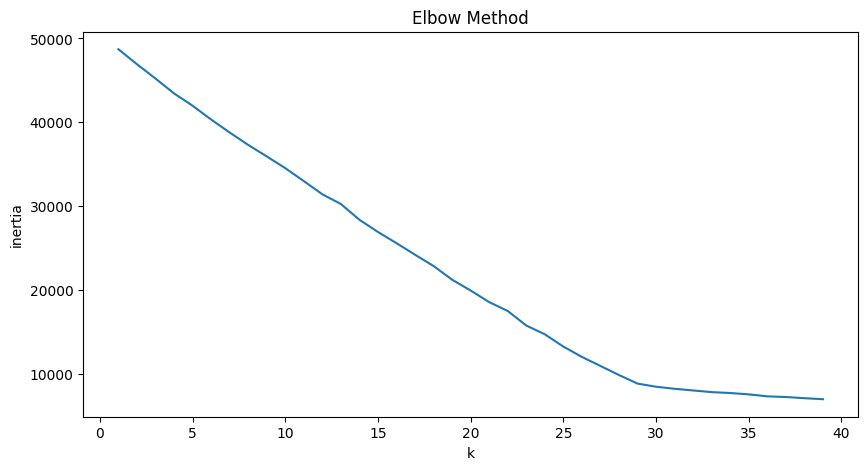

In [10]:
optimize_kmeans(data[tcols], 40)

#### 4 Apply K-Means Clustering

In [11]:
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,-0.127003,-0.075001,-0.051644,-0.291466,-0.367562,-0.0387,-0.027586,-0.024822,-0.383910,0
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,-0.127003,-0.075001,-0.051644,-0.295372,-0.362811,-0.0387,-0.027586,-0.024822,-0.018586,7
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,-0.127003,-0.075001,-0.051644,-0.269832,0.074161,-0.0387,-0.027586,-0.024822,-0.538243,7
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,-0.127003,-0.075001,-0.051644,-0.306387,-0.264664,-0.0387,-0.027586,-0.024822,-0.528194,6
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,-0.127003,-0.075001,-0.051644,-0.306387,-0.388367,-0.0387,-0.027586,-0.024822,-0.369525,12


## Write K-Means Model to File

In [12]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## Write Means to File

In [13]:
mean = data[col].mean()
std = data[col].std()
with open("../data/meanAndStd.csv", "w") as f:
    f.write(",".join([x for x in col]) + "\n")
    f.write(",".join([str(mean[x]) for x in col]) + "\n")
    f.write(",".join([str(std[x]) if std[x] != 0 else "1.0" for x in col]) + "\n")


## Write Clusterized Data to File

In [14]:
clusterized_col = ["CreatedAt", "AvatarUrl"] + col + ['cluster']
with open("../data/clustered_data.csv", 'w') as f:
    f.write("Username," + ",".join([x for x in clusterized_col]) + "\n")
    for index, row in data.iterrows():
        f.write(index + "," + ",".join([str(row[x]) for x in clusterized_col]) + "\n")


## Debugging Code

In [15]:
train = data.sample(n=1)
train.drop(columns=['cluster'], inplace=True)

v = kmeans.predict(train[tcols])
v


array([5])